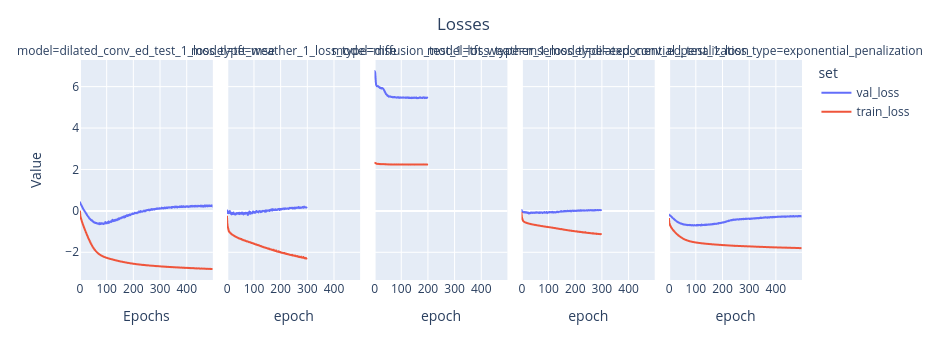

In [8]:
import plotly.express as px
import pandas as pd
tot_losses = pd.read_csv('/home/agobbi/Projects/ExpTS/weather/csv/prova_test_LOSSES.csv')

fig_losses = px.line(tot_losses,x = 'epoch',y='loss',color = 'set',facet_col='model',width = 2600)
#fig_losses.update_traces(mode="markers+lines", hovertemplate=None)
#fig_losses.update_layout(hovermode="x unified")
fig_losses.update_layout(title = {'text':f'Losses', 'x':0.5},
                  xaxis_title={'text':'Epochs'},
                  yaxis_title={'text':'Value'},

                    )
    
fig_losses

In [3]:
tot_losses

Unnamed: 0  epoch         set      loss  \
0              0      0    val_loss  8.533897   
1              1      1    val_loss  8.540814   
2              2      2    val_loss  8.546171   
3              3      3    val_loss  8.545411   
4              4      4    val_loss  8.543315   
...          ...    ...         ...       ...   
8379        8379    794  train_loss -0.722028   
8380        8380    795  train_loss -0.711875   
8381        8381    796  train_loss -0.718294   
8382        8382    797  train_loss -0.720680   
8383        8383    798  train_loss -0.719731   

                                 model  
0       diffusion_test_1_loss_type=mse  
1       diffusion_test_1_loss_type=mse  
2       diffusion_test_1_loss_type=mse  
3       diffusion_test_1_loss_type=mse  
4       diffusion_test_1_loss_type=mse  
...                                ...  
8379  patchtst_weather_1_loss_type=mse  
8380  patchtst_weather_1_loss_type=mse  
8381  patchtst_weather_1_loss_type=mse  
8382  patchtst_weather_1_loss_type=mse  
8383  patchtst_weather_1_loss_type=mse  

[8384 rows x 5 columns]

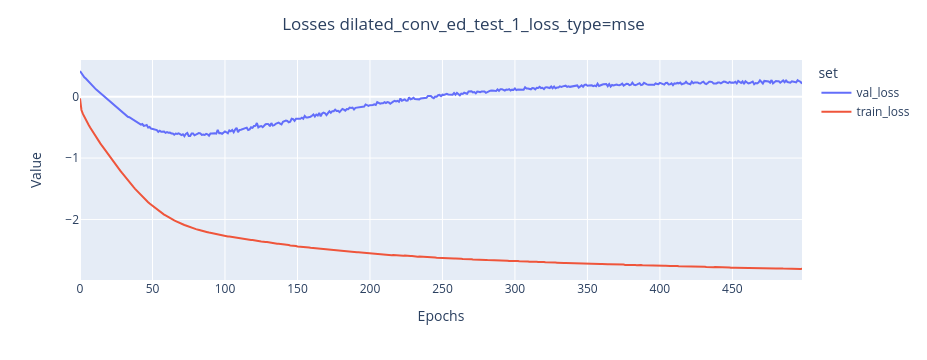

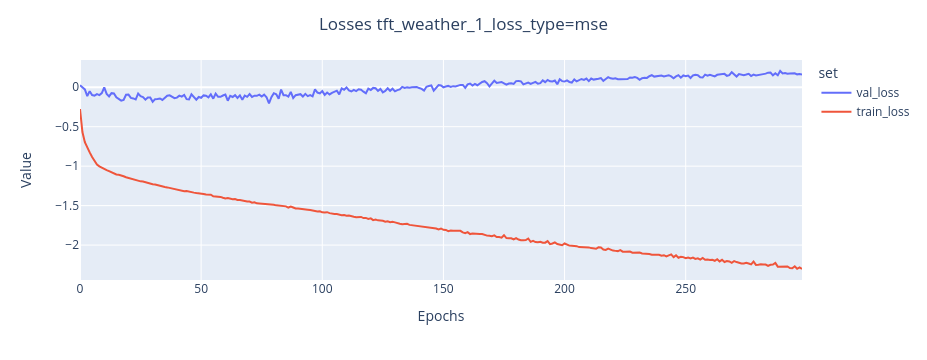

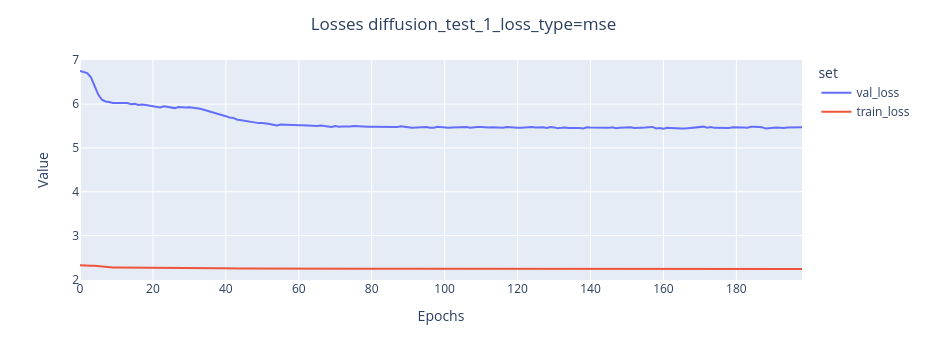

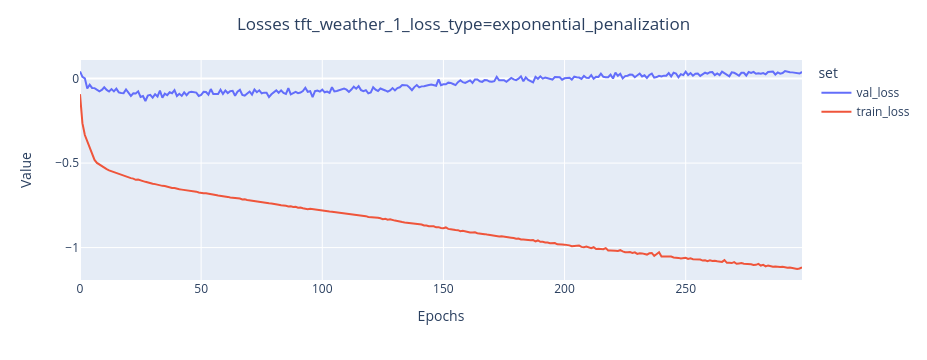

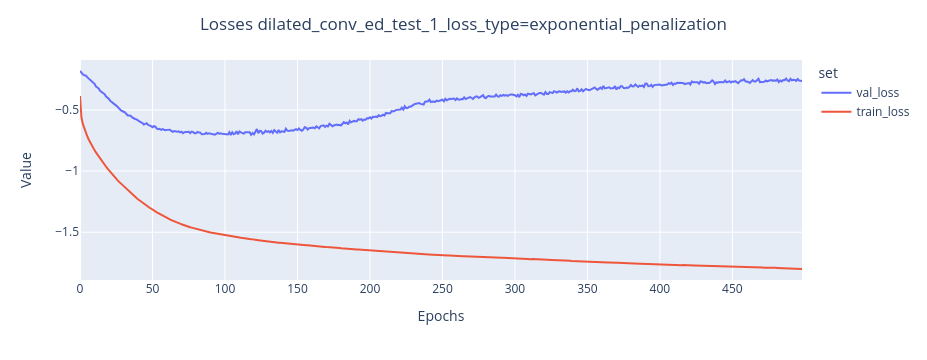

In [10]:
import plotly.express as px
import pandas as pd
import numpy as np
tot_losses = pd.read_csv('/home/agobbi/Projects/ExpTS/weather/csv/prova_test_LOSSES.csv')
for c in tot_losses.model.unique():
    fig_losses = px.line(tot_losses[tot_losses.model==c],x = 'epoch',y='loss',color = 'set')
    fig_losses.update_layout(title = {'text':f'Losses '+c, 'x':0.5},
                  xaxis_title={'text':'Epochs'},
                  yaxis_title={'text':'Value'},

                    )
    fig_losses.show()

In [11]:
import plotly.express as px
import pandas as pd
import numpy as np
tot_pred = pd.read_csv('/home/agobbi/Projects/ExpTS/weather/csv/prova_test_tot_predictions.csv')
tot_pred.sort_values(by='time',inplace=True)
#tot_pred.y_median[tot_pred.model=='d3vae_weather_1'] = tot_pred.y_pred[tot_pred.model=='d3vae_weather_1']
#tot_pred.y_median[tot_pred.model=='persistent_weather_1'] = tot_pred.y_pred[tot_pred.model=='persistent_weather_1']

In [12]:
try:
    tot_pred.y_pred[pd.isnull(tot_pred.y_pred)] = tot_pred.y_median[pd.isnull(tot_pred.y_pred)] 
except:
    tot_pred['y_pred'] = tot_pred.y_median.values

AttributeError: 'DataFrame' object has no attribute 'y_median'

In [ ]:
tot_pred.lag.max()

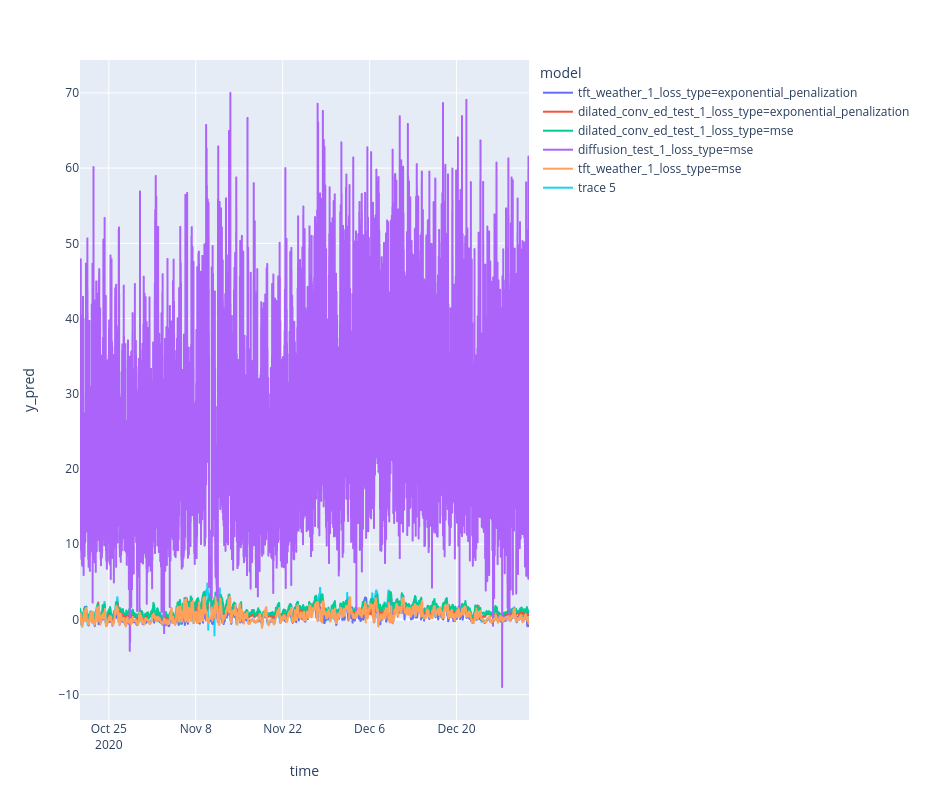

In [13]:
lag=17
fig = px.line(tot_pred[(tot_pred.lag==lag)], x='time', y='y_pred', color='model',height=800)
fig.add_scatter(x = tot_pred[(tot_pred.lag==lag) & (tot_pred.model==tot_pred.model.unique()[0])].time, y=tot_pred[(tot_pred.lag==lag) & (tot_pred.model==tot_pred.model.unique()[0])].y)


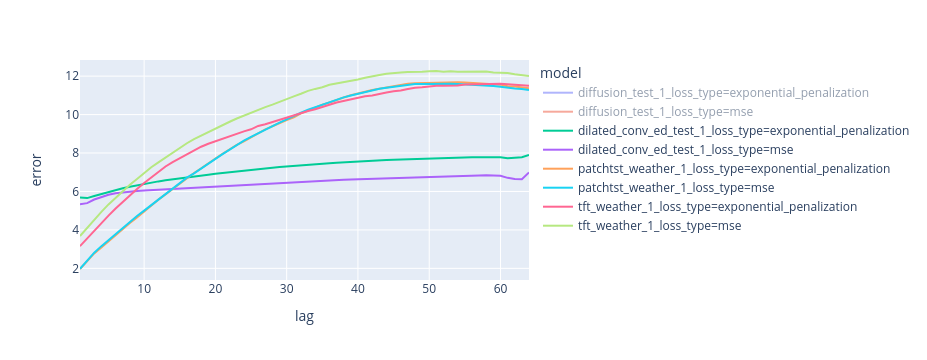

In [8]:
import numpy as np
error = tot_pred.groupby(['lag','model']).apply(lambda x: np.nanmean(np.abs(x.y-x.y_pred))).reset_index().rename(columns={0:'error'}) 
import numpy as np
fig = px.line(error, x='lag', y='error', color='model',height=800)
fig.show() #150--400

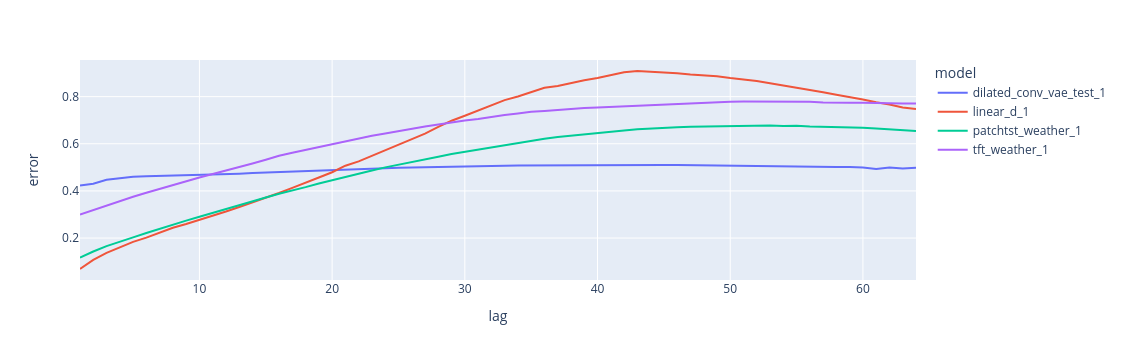

In [6]:
import numpy as np
error = tot_pred.groupby(['lag','model']).apply(lambda x: np.nanmean(np.abs(x.y-x.y_pred))).reset_index().rename(columns={0:'error'}) 
import numpy as np
fig = px.line(error, x='lag', y='error', color='model',height=800)
fig.show() #150--400

In [8]:
error.groupby('model').error.mean()

model
dilated_conv_vae_test_1    0.492419
linear_d_1                 0.630222
patchtst_weather_1         0.519284
tft_weather_1              0.650788
Name: error, dtype: float64

In [9]:
tot_pred = tot_pred.reset_index().drop(columns = ['index','Unnamed: 0'])

In [10]:
tot_pred.model.unique()

array(['diffusion_test_1_loss_type=mse',
       'patchtst_weather_1_loss_type=exponential_penalization',
       'tft_weather_1_loss_type=mse',
       'dilated_conv_ed_test_1_loss_type=exponential_penalization',
       'tft_weather_1_loss_type=exponential_penalization',
       'diffusion_test_1_loss_type=exponential_penalization',
       'patchtst_weather_1_loss_type=mse',
       'dilated_conv_ed_test_1_loss_type=mse'], dtype=object)

In [11]:
persistence = tot_pred[(tot_pred.model==tot_pred.model.unique()[0]) & (tot_pred.lag==1) ].drop_duplicates()
persistence = persistence[['prediction_time','y_pred']].rename(columns={'y_pred':'y_prec'}).reset_index()[['prediction_time','y_prec']]


In [12]:
persistence

prediction_time       y_prec
0      2020-10-20 05:50:00  1627.540999
1      2020-10-20 06:00:00  1405.026621
2      2020-10-20 06:10:00  1669.765917
3      2020-10-20 06:20:00  1291.375812
4      2020-10-20 06:30:00  1774.654418
...                    ...          ...
10408  2020-12-31 12:30:00  1569.932438
10409  2020-12-31 12:40:00  1806.602241
10410  2020-12-31 12:50:00  1542.461382
10411  2020-12-31 13:00:00  1928.609376
10412  2020-12-31 13:10:00  1658.070515

[10413 rows x 2 columns]

In [13]:
tot_pred_new = pd.merge(tot_pred,persistence,on='prediction_time',how='left')

In [14]:
tot_pred_new = tot_pred_new.sort_values(by=['prediction_time','model','lag'])

In [15]:
tot_pred_new_prec = tot_pred_new[tot_pred_new.model == tot_pred_new.model.values[0]]

In [16]:
tot_pred_new_prec.model = 'persistent'
tot_pred_new_prec.y_pred = tot_pred_new_prec.y_prec
tot_pred_new = pd.concat([tot_pred_new,tot_pred_new_prec],ignore_index=True)

/tmp/ipykernel_56412/1064679427.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_56412/1064679427.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
WEIGHT = 1
def compute(x,alpha=1):

    try:
        prec = x.y_prec[x.lag==1].values[0]
    except:
        return None,None
    #prec = x.y_pred.values.mean()
    error = np.abs(x.y_pred.values-x.y.values)
    scostamento_persistente = np.abs(x.y_pred.values-prec)


    return error.mean(),scostamento_persistente.mean(),(error*(1+WEIGHT*np.exp(-scostamento_persistente))).mean()

def compute_fun(x):
    error, scostamento, tot_error = compute(x)
    return pd.Series({'error':error if error is not None else np.nan, 
                      'error_p':scostamento if scostamento is not None else np.nan,
                      'error_tot':tot_error if tot_error is not None else np.nan})

In [18]:
agg = tot_pred_new.groupby(['prediction_time','model']).apply(compute_fun).reset_index().dropna()


In [19]:
pd.set_option('display.max_colwidth', None)

agg.groupby('model')[['error','error_p','error_tot']].mean().reset_index().sort_values(by='error_p')

model        error  \
6                                                 persistent  1166.587392   
1                             diffusion_test_1_loss_type=mse  1165.423695   
0        diffusion_test_1_loss_type=exponential_penalization  1164.679636   
5                           patchtst_weather_1_loss_type=mse     8.925319   
4      patchtst_weather_1_loss_type=exponential_penalization     8.937888   
3                       dilated_conv_ed_test_1_loss_type=mse     6.415852   
7           tft_weather_1_loss_type=exponential_penalization     9.345912   
8                                tft_weather_1_loss_type=mse    10.086456   
2  dilated_conv_ed_test_1_loss_type=exponential_penalization     7.164516   

       error_p    error_tot  
6     0.000000  2333.174783  
1   239.860320  1186.672738  
0   243.186244  1167.709127  
5  1167.584922     8.925319  
4  1167.676675     8.937888  
3  1169.690167     6.415852  
7  1169.808374     9.345912  
8  1171.115744    10.086456  
2  1171.221872     7.164516

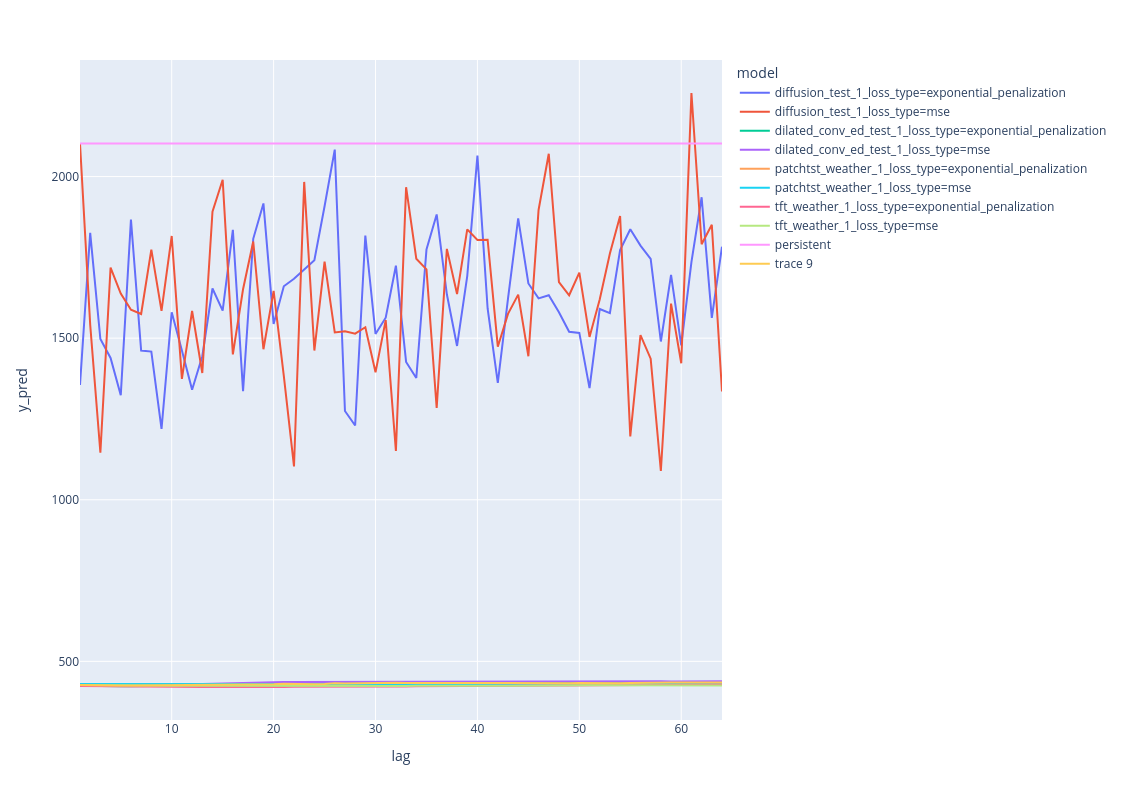

In [20]:
#27-11-2020
date  ='2020-12-19 13:20:00'
subset = tot_pred_new[(tot_pred_new.prediction_time==date)]
fig = px.line(subset, x='lag', y='y_pred', color='model',height=800)
fig.add_scatter(x = subset.lag[subset.model==subset.model.unique()[0]], y=subset.y[subset.model==subset.model.unique()[0]])

fig.show()

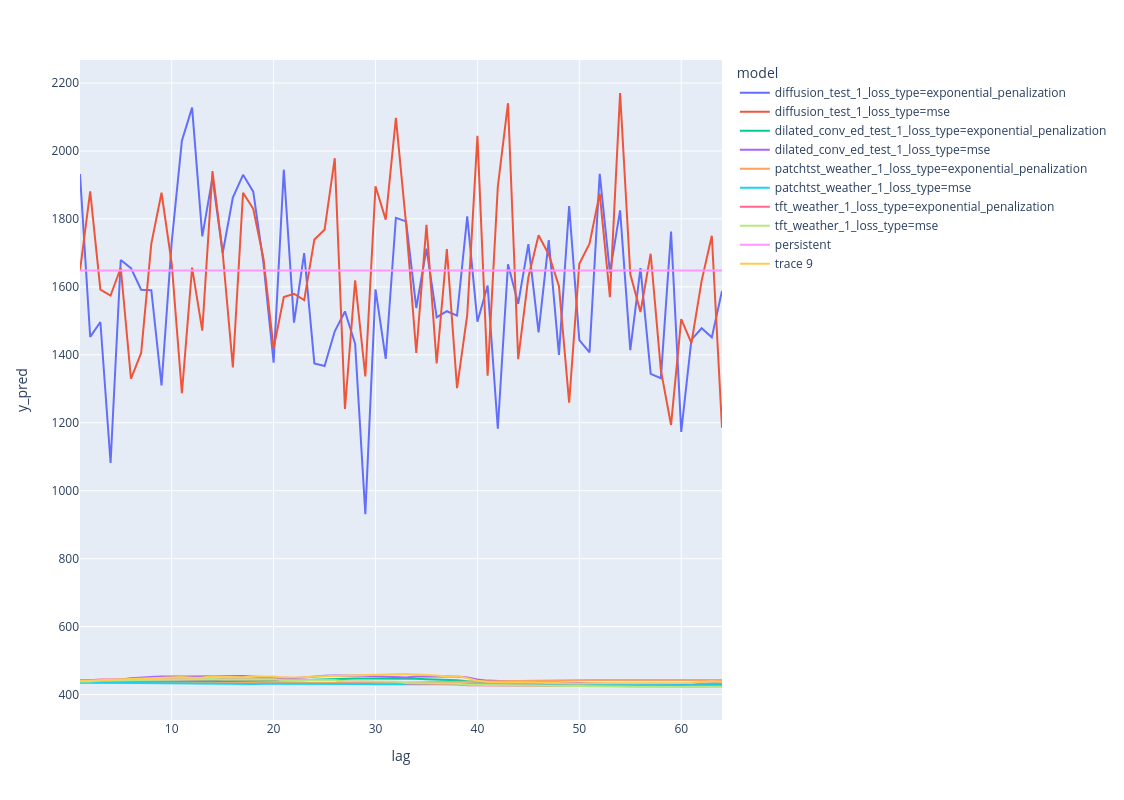

In [23]:
date  ='2020-12-08 05:30:00'
subset = tot_pred_new[(tot_pred_new.prediction_time==date)]
fig = px.line(subset, x='lag', y='y_pred', color='model',height=800)
fig.add_scatter(x = subset.lag[subset.model==subset.model.unique()[0]], y=subset.y[subset.model==subset.model.unique()[0]])

fig.show()

In [21]:
import plotly.express as px
import pandas as pd
import numpy as np
tot_pred = pd.read_csv('/home/agobbi/Projects/ExpTS/weather_paper/csv/prova_test_tot_predictions.csv')
tot_pred.sort_values(by='time',inplace=True)



FileNotFoundError: [Errno 2] No such file or directory: '/home/agobbi/Projects/ExpTS/weather_paper/csv/prova_test_tot_predictions.csv'

In [22]:
error = tot_pred.groupby(['lag','model']).apply(lambda x: 100*np.nanmean(np.abs(x.y-x.y_pred)/x.y)).reset_index().rename(columns={0:'error'}) 
fig = px.line(error, x='lag', y='error', color='model',height=600,width=1000)
fig.update_layout(legend=dict(x=0.65,y=.1),font=dict(size=16)) 
fig.write_image('error.pdf')

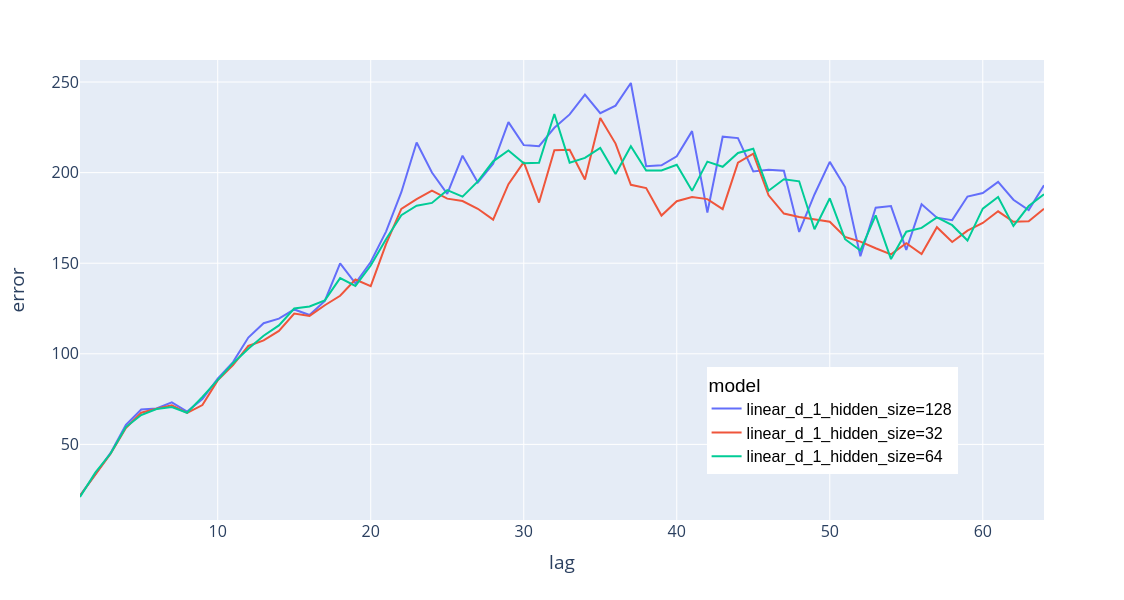